In [1]:
from platform import python_version

print(python_version())

3.10.6


# Classification of Structured Data using `Keras`

* Case study with `iris` dataset

**For the theory of artificial neural networks, you may review pages 261-275 of *Supervised Learning with Python* by Vaibhav Verdhan**

An example on structured dats is provided in pages 276-281.

Another example on classifying the iris data set with keras is found in the link:
https://janakiev.com/blog/keras-iris/

## Load the `python` modules

**NOTICE 1 on `tensorflow` installation issues:**

* If you are experiencing the following error message when trying to install `tensorflow`:

```
UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow-gpu -> python[version='3.5.*|3.6.*|3.7.*|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0|>=3.5,<3.6.0a0|>=2.7,<2.8.0a0']

Your python: python=3.8
```

* you will have to create an environment in `python 3.7`, as follows:

    * either type in the command window:
```
conda create -n p37env python=3.7
conda activate p37env
```

    * or create a new environment in Anaconda, but selecting the 3.7 version of python

* Then, install tensorflow in Anaconda the same way you do for any other package.

**NOTICE 2 on `tensorflow` installation issues on `MACOS`:**

If you wish to work on a MacOS machine, do the following to properly install `tensorflow-2`:

* Open a `terminal` window and on the `base` type the following commands:

`conda create python=3.10.6 --name <NAME>`

`conda activate <NAME>`

`conda install -c apple tensorflow-deps`

`python -m pip install tensorflow-macos`

`python -m pip install tensorflow-metal`

* Once everything is finished, you may need to install Jupyter Notebook
* It is not installed by default with this version of macos-supported tensorflow

`conda install jupyter`

* to activate Jupyter notebook and start working, type on the terminal:

`jupyter notebook`

* or refresh the Anaconda.Navigator Home page and you will see the icon of Jupyter Notebook.

* **CAUTION** This installation does not pre-install many python packages related to machine learning. 
* You will have to install them 

In [2]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.datasets import load_iris

# Configure the matlotlib backend as plotting inline in IPython:
%matplotlib inline

## Load and explore the dataset

In [3]:
iris = load_iris()

### Convert the dataset into a pandas dataframe:

In [4]:
# convert the dataset into a pandas dataframe (just a matter of taste!)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#### Change the names of the columns (features):

In [5]:
iris_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df.columns = iris_features

#### Add a column of the target classes to the dataframe:

In [6]:
iris_df["target"] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Add a column for the target classes that contains the names of the species:

In [7]:
import random

In [8]:
random.sample(range(10, 30), 5)

[25, 26, 14, 18, 17]

In [9]:
iris_df['species'] = [iris.target_names[x] for x in iris.target]
iris_df.iloc[random.sample(range(0, 150), 5)]

,sepal_length,sepal_width,petal_length,petal_width,target,species
140,6.7,3.1,5.6,2.4,2,virginica
115,6.4,3.2,5.3,2.3,2,virginica
8,4.4,2.9,1.4,0.2,0,setosa
17,5.1,3.5,1.4,0.3,0,setosa
39,5.1,3.4,1.5,0.2,0,setosa


In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Plot pair-wise the features of the dataframe

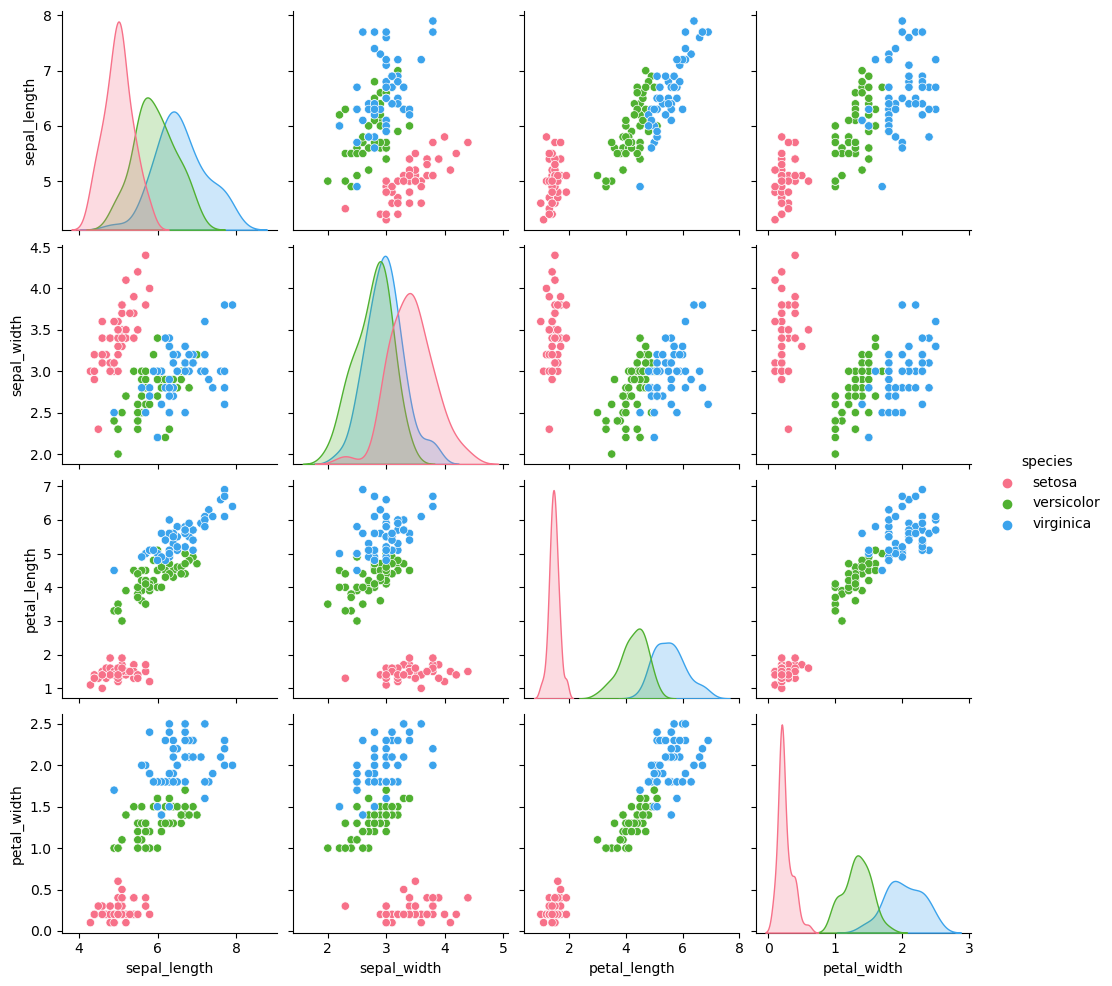

In [ ]:
sns.pairplot(iris_df, vars = iris_df.columns[0:4], hue='species', palette='husl')

<Axes: >

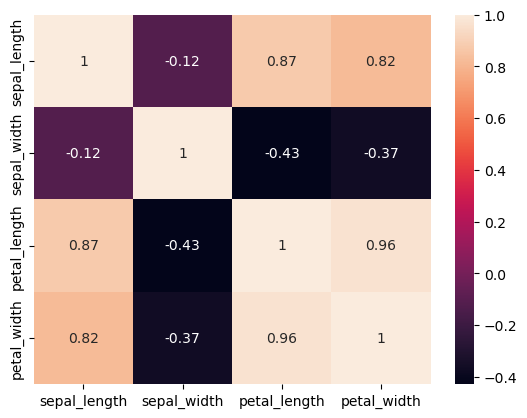

In [12]:
sns.heatmap(iris_df[iris_features].corr(), annot=True)

## Dataset preparation for NN:

In [13]:
X = iris_df[iris_features]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
species_or_encoding = 'encoding'

# if the classes are in terms of the species names:
if species_or_encoding == 'name':
    y = iris_df.species

# if the classes are in terms of the encoding: 0, 1, 2:
if species_or_encoding == 'encoding':
    y = iris_df.target

#X = np.asarray(X)
#y = np.asarray(y)

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Scale the dataset:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$z = \dfrac{x - \mu}{s}$$

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale data to have mean 0 and variance 1 
# This is importance for convergence of the neural network
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [17]:
X[:4,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

### Convert target into LabelEncoder

`sklearn.preprocessing.LabelEncoder`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

* Encode target labels with values between 0 and `n_classes-1` (convert the human language into numbers, i.e. Male to 0 Female to 1, etc.)

* This transformer should be used to encode target values, i.e. y, and not the input X.

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(iris_df.species)
# I took the column with the names of the species
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Convert target into one hot encoding

`sklearn.preprocessing.OneHotEncoder`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

* Encode categorical features as a one-hot numeric array.
* The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features.

In [20]:
from sklearn.preprocessing import OneHotEncoder

#### Use the *human language* names of the categorical data:

In [21]:
ohe = OneHotEncoder()

In [22]:
transformed = ohe.fit_transform(iris_df[['species']])

In [23]:
print(transformed.toarray()[random.sample(range(0, 150), 5)])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [24]:
print(ohe.categories_)

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]


In [25]:
inv_transformed = ohe.inverse_transform(transformed)

In [26]:
inv_transformed[random.sample(range(0, 150), 5)]

array([['virginica'],
       ['versicolor'],
       ['virginica'],
       ['virginica'],
       ['setosa']], dtype=object)

#### Use an already numeric-encoded categorical data:

In [27]:
ohe2 = OneHotEncoder()

In [28]:
transformed2 = ohe2.fit_transform(y1.reshape(-1,1))

In [29]:
print(transformed2.toarray()[random.sample(range(0, 150), 5)])

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [30]:
inv_transformed2 = ohe2.inverse_transform(transformed2)
inv_transformed2[random.sample(range(0, 150), 5)]

array([[1],
       [0],
       [0],
       [2],
       [1]])

#### Use the `get_dummies` pandas function to achieve the same one-hot-encoding result:

In [31]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


#### Remember:

At the end, you need an array like the one in the previous or next line, to feed the NN model.

In [32]:
Y = transformed.toarray()
Y[random.sample(range(0, 150), 5)]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

### Split the dataset:

In [33]:
from sklearn.model_selection import train_test_split

X = iris_df.loc[0:99, iris_features]

y = iris_df.loc[0:99, 'target']

X = np.asarray(X)

y = np.asarray(y)

In [34]:
# The data is split into training and testing sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.25, 
                                                    random_state = 2
                                                   )
# print out the shape of the training and testing sets:
# Check to make sure split still has 4 features and 3 labels:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(112, 4)
(112, 3)
(38, 4)
(38, 3)


In [35]:
type(X_train), type(Y_train)

(numpy.ndarray, numpy.ndarray)

In [36]:
print(Y_train[0:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


* Convert to numpy arrays so that we can use with TensorFlow
```python
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)
```

In [37]:
print(X_train[0:5])

[[-0.41600969 -1.74335684  0.13754657  0.13250973]
 [ 1.2803405   0.09821729  0.76275827  1.44883158]
 [ 0.18982966 -0.36217625  0.42173371  0.3957741 ]
 [ 0.4321654  -0.36217625  0.30805885  0.13250973]
 [ 1.15917263  0.32841405  1.21745768  1.44883158]]


## Load the `tensorflow` modules

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

### Design the ANN:

In [39]:
iris_cls_NN = Sequential()

Metal device set to: Apple M1 Max


In [40]:
n_features = X.shape[1]
n_classes = Y.shape[1]
nodes = 5
print('number of features: ', n_features)
print('number of classes: ', n_classes)

number of features:  4
number of classes:  3


### FIRST hidden layer in the network

In [41]:
# FIRST hidden layer in the network
# number of neurons: units=5
# activation function: activation=ReLU
# weights initialization: kernel_initializer=random normal
iris_cls_NN.add(Dense(units=nodes, 
                      activation='relu', 
                      kernel_initializer='random_normal',
                      input_dim=n_features
                     )
               )

### SECOND hidden layer in the network

In [42]:
# SECOND hidden layer in the network
# number of neurons: 5
# activation function: ReLU
# weights initialization: random normal
iris_cls_NN.add(Dense(units=nodes, 
                      activation='relu', 
                      kernel_initializer='random_normal',
                     )
               )
# The input to this layer comes from the previous layer,
# so there is no need to specify the dimensions of the input vector

### OUTPUT layer in the network

In [43]:
# OUTPUT hidden layer in the network
# number of neurons: 1
# activation function: sigmoid
# weights initialization: random normal
iris_cls_NN.add(Dense(units=n_classes, 
                      activation='softmax', #  sigmoid
                      kernel_initializer='random_normal'
                     )
               )

* A sigmoid function is a type of activation function and is also known as a squashing function. A squashing function limits the output to a range between 0 and 1, making it suitable in predicting probabilities.

In [44]:
iris_cls_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [45]:
iris_cls_NN.layers

In [46]:
from tensorflow.keras.utils import plot_model

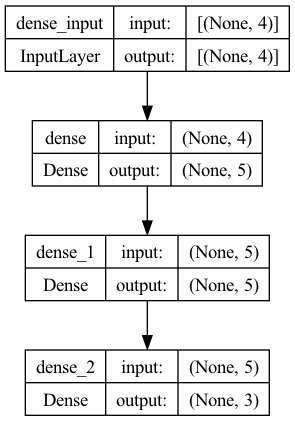

In [47]:
plot_model(iris_cls_NN, to_file="iris_cls_NN.png", show_shapes=True)

### Configure the model for training

```python
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
```

* Select the optimization method:

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

* another syntax:
```python
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

iris_cls_NN.compile(optimizer=opt, #  sgd
                   loss='categorical_crossentropy', 
                   metrics=['accuracy']
                   )
```

In [48]:
# Optimize the model using adam optimizer with cross_entropy as the loss:
iris_cls_NN.compile(optimizer='adam', #  sgd
                   loss='categorical_crossentropy', 
                   metrics=['accuracy']
                   )
# loss: binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy

* another syntax:
`from tensorflow.keras.callbacks import TensorBoard`

* TensorBoard Callback
`cb = TensorBoard()`

### Train the model for a fixed number of epochs (iterations on a dataset)

```python
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```
* `x`: features vector
* `y`: labels
* `batch_size`: Number of samples per gradient update. If unspecified, batch_size will default to 32
* `epochs`: An epoch is an iteration over the entire x and y data provided
* `verbose`: 0 = silent, 1 = progress bar, 2 = one line per epoch
* `validation_split`: Float between 0 and 1. Fraction of the training data to be used as validation data
* `validation_data`: Data on which to evaluate the loss and any model metrics at the end of each epoch

In [49]:
# Train the model:
iris_history_cb = iris_cls_NN.fit(X_train, Y_train, 
                                  batch_size=5, 
                                  epochs=20, 
                                  verbose=1,
                                  validation_data=(X_test, Y_test)
                                 )

Epoch 1/20


2023-05-29 10:58:04.700716: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


23/23 [==============================] - 1s 26ms/step - loss: 1.0988 - accuracy: 0.2946 - val_loss: 1.0987 - val_accuracy: 0.2895
Epoch 2/20
23/23 [==============================] - 0s 16ms/step - loss: 1.0981 - accuracy: 0.3482 - val_loss: 1.0988 - val_accuracy: 0.3158
Epoch 3/20
23/23 [==============================] - 0s 14ms/step - loss: 1.0975 - accuracy: 0.5089 - val_loss: 1.0988 - val_accuracy: 0.3947
Epoch 4/20
23/23 [==============================] - 0s 14ms/step - loss: 1.0964 - accuracy: 0.5446 - val_loss: 1.0980 - val_accuracy: 0.5526
Epoch 5/20
23/23 [==============================] - 0s 14ms/step - loss: 1.0935 - accuracy: 0.6339 - val_loss: 1.0942 - val_accuracy: 0.5526
Epoch 6/20
23/23 [==============================] - 0s 16ms/step - loss: 1.0847 - accuracy: 0.6429 - val_loss: 1.0810 - val_accuracy: 0.5526
Epoch 7/20
23/23 [==============================] - 0s 15ms/step - loss: 1.0649 - accuracy: 0.6696 - val_loss: 1.0542 - val_accuracy: 0.7895
Epoch 8/20
23/23 [======

### Check the accuracy of the model

In [50]:
iris_cls_NN.metrics_names

['loss', 'accuracy']

#### Get the loss value & metrics values for the model in test mode

```python
evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)
```

In [51]:
score = iris_cls_NN.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3757701814174652
Test accuracy: 0.8421052694320679


## Training Accuracy and Loss

The `History.history` attribute of the trained model is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

Text(0.5, 0, 'epochs')

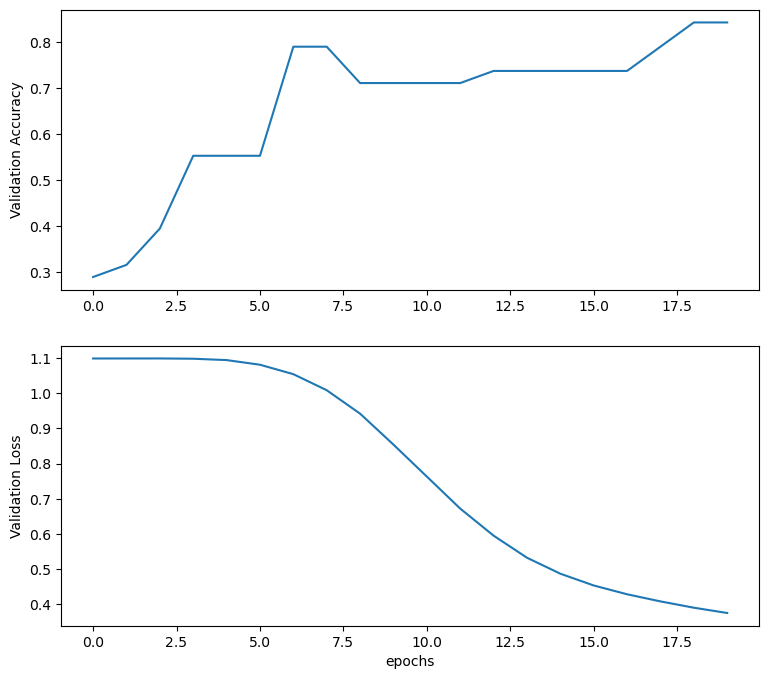

In [52]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 8))

val_accurady = iris_history_cb.history['val_accuracy']
val_loss = iris_history_cb.history['val_loss']
ax1.plot(val_accurady)
ax2.plot(val_loss)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
#ax1.legend()
#ax2.legend()

### Comments on the figures above
* If the accuracy is improving on every epoch, your training is in the right direction
* Similarly, the loss should keep on reducing on every epoch
* If you are not satisfied with the performance, you may adjust the model parameters and retrain it to improve the accuracy
* You may try a different optimizer and/or introduce regularization to improve the model accuracy
*  If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set

### Learning curves:

The mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch

In [53]:
maxes = []
for met in iris_history_cb.history.keys():
    maxes.append(max(iris_history_cb.history[met]))
mmax = max(maxes)

(0.0, 1.1537887573242187)

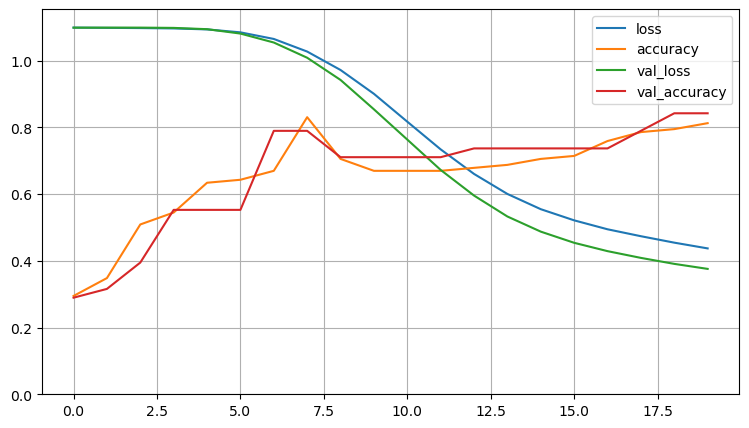

In [54]:
pd.DataFrame(iris_history_cb.history).plot(figsize=(9, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.05*mmax) # set the vertical range to [0-1] plt.show()

### Predict new data

```python
predict(
    x,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```
* the model estimates one probability per class

In [55]:
y_pred = iris_cls_NN.predict(X_test)
y_pred

2/2 [==============================] - 0s 18ms/step


array([[0.95450443, 0.03408377, 0.01141185],
       [0.93890005, 0.04488952, 0.01621044],
       [0.01310793, 0.3402578 , 0.6466342 ],
       [0.92961234, 0.05147118, 0.01891648],
       [0.9444401 , 0.04105356, 0.01450628],
       [0.0098505 , 0.2888992 , 0.7012503 ],
       [0.9041965 , 0.06888785, 0.0269157 ],
       [0.00607591, 0.28248888, 0.7114352 ],
       [0.00716274, 0.2791441 , 0.7136932 ],
       [0.91500473, 0.06150751, 0.02348775],
       [0.95371825, 0.03463263, 0.01164911],
       [0.95488125, 0.03382037, 0.01129841],
       [0.93807167, 0.045405  , 0.01652339],
       [0.9504361 , 0.03691582, 0.01264811],
       [0.08801959, 0.42455196, 0.4874285 ],
       [0.02721872, 0.3737811 , 0.5990002 ],
       [0.8171185 , 0.12869859, 0.05418288],
       [0.10520721, 0.4826496 , 0.41214314],
       [0.00515743, 0.2332758 , 0.7615668 ],
       [0.07894273, 0.49547535, 0.42558193],
       [0.01797093, 0.33150172, 0.65052736],
       [0.0490775 , 0.41689724, 0.5340253 ],
       [0.

* If you only care about the class with the highest estimated probability use the `predict_classes()` method 

In [56]:
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2])

In [57]:
np.array(np.unique(iris_df.species))[y_pred_class]

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica'], dtype=object)

## ROC Curve

The ROC plot compares the false positive rate with the true positive rate.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [58]:
from sklearn.metrics import roc_curve, auc

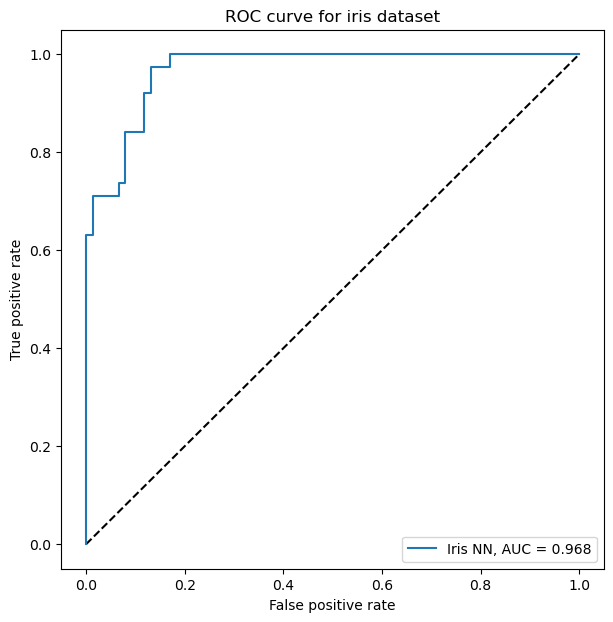

In [59]:
figROC, axROC = plt.subplots(figsize=(7,7))
axROC.plot([0, 1], [0, 1], 'k--')

#Y_pred = iris_cls_NN.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), y_pred.ravel())
    
axROC.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('Iris NN', auc(fpr, tpr)))
axROC.set_xlabel('False positive rate')
axROC.set_ylabel('True positive rate')
axROC.set_title('ROC curve for iris dataset')
axROC.legend()

### Organize the construction of the NN within a python function:

In [60]:
def create_keras_model(input_dim, output_dim, nodes, n=1, name='model'):
    '''
    How to call:
    myModel = create_keras_model(n_features, n_classes, nodes=8, n=2, name='myModel')
    '''
    # Create model
    model = Sequential(name=name)
    model.add(Dense(units=nodes,
                    input_dim=input_dim,
                    activation='relu',
                    kernel_initializer='random_normal'
                   )
             )
    # add HIDDEN layers to the network:
    for i in range(n):
        model.add(Dense(units=nodes,
                        activation='relu',
                        kernel_initializer='random_normal'
                       )
                 )
    # OUTPUT layer:
    model.add(Dense(output_dim, 
                    activation='softmax', #  sigmoid
                   )
             )
    
    model.compile(optimizer='adam', #  sgd
                  loss='categorical_crossentropy', # 'mean_squared_error'
                  metrics=['accuracy', 'mse']# 'mse'
                 )
    
    return model

In [61]:
help(create_keras_model)

Help on function create_keras_model in module __main__:

create_keras_model(input_dim, output_dim, nodes, n=1, name='model')
    How to call:
    myModel = create_keras_model(n_features, n_classes, nodes=8, n=2, name='myModel')



In [62]:
# repeat the steps to create a NN model (see above)
myModel = create_keras_model(n_features, 
                             n_classes, 
                             8, 
                             n=1, 
                             name='myModel'
                            )

In [63]:
myModel.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [64]:
iris_history = myModel.fit(X_train, Y_train, 
                           batch_size=1, 
                           epochs=20, 
                           verbose=1,
                           validation_data=(X_test, Y_test)
                          )

Epoch 1/20
112/112 [==============================] - 2s 14ms/step - loss: 1.0825 - accuracy: 0.4464 - mse: 0.2186 - val_loss: 1.0345 - val_accuracy: 0.7368 - val_mse: 0.2077
Epoch 2/20
112/112 [==============================] - 2s 14ms/step - loss: 0.9441 - accuracy: 0.6786 - mse: 0.1866 - val_loss: 0.7481 - val_accuracy: 0.7105 - val_mse: 0.1408
Epoch 3/20
112/112 [==============================] - 2s 14ms/step - loss: 0.6729 - accuracy: 0.6518 - mse: 0.1317 - val_loss: 0.5030 - val_accuracy: 0.7105 - val_mse: 0.0987
Epoch 4/20
112/112 [==============================] - 1s 13ms/step - loss: 0.5264 - accuracy: 0.6518 - mse: 0.1114 - val_loss: 0.4214 - val_accuracy: 0.7105 - val_mse: 0.0893
Epoch 5/20
112/112 [==============================] - 1s 13ms/step - loss: 0.4758 - accuracy: 0.6786 - mse: 0.1045 - val_loss: 0.3888 - val_accuracy: 0.7368 - val_mse: 0.0850
Epoch 6/20
112/112 [==============================] - 1s 12ms/step - loss: 0.4487 - accuracy: 0.7411 - mse: 0.0994 - val_loss

### What is recorded in history:

In [65]:
print(iris_history.history.keys())

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


Text(0.5, 0, 'epochs')

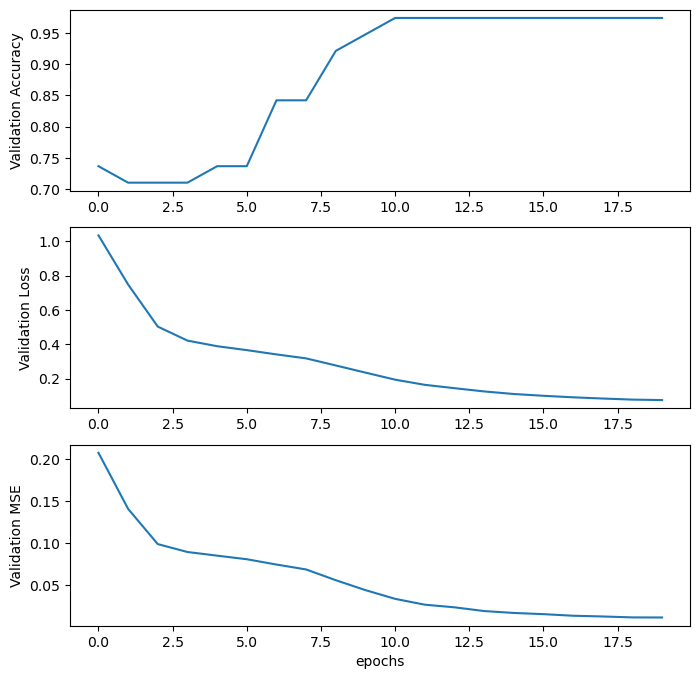

In [66]:
fig2, (ax21, ax22, ax23) = plt.subplots(3, figsize=(8, 8))

#val_accurady = iris_history.history['val_accuracy']
#val_loss = iris_history.history['val_loss']
ax21.plot(iris_history.history['val_accuracy'])
ax22.plot(iris_history.history['val_loss'])
ax23.plot(iris_history.history['val_mse'])
  
ax21.set_ylabel('Validation Accuracy')
ax22.set_ylabel('Validation Loss')
ax23.set_ylabel('Validation MSE')
ax23.set_xlabel('epochs')

In [67]:
iris_history.history['val_accuracy'][-1]

0.9736841917037964

## How to improve the performance

* If you are not satisfied with the performance of your model you should tune the hyperparameters
1. check the learning rate 
2. try another optimizer
3. try tuning model hyperparameters such as
    - the number of layers,
    - the number of neurons per layer, and
    - the types of activation functions to use for each hidden layer
    - the batch size

## Generate the confusion matrix of the model

`tensorflow.math.confusion_matrix`

https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix

```python
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
```

In [68]:
ytest_real = np.where(Y_test!=0)[1]
ytest_real

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [69]:
y_pred_class

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2])

In [70]:
cm = tf.math.confusion_matrix(ytest_real, y_pred_class)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[16,  0,  0],
       [ 0,  5,  6],
       [ 0,  0, 11]], dtype=int32)>

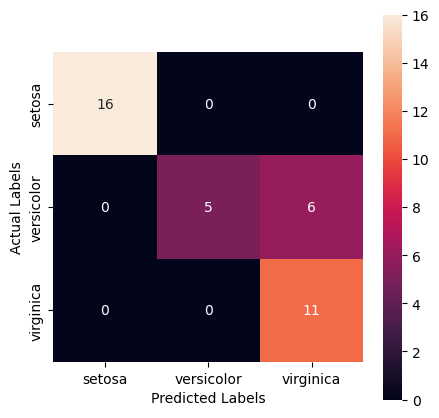

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris.target_names,
                 yticklabels=iris.target_names)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels');

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(ytest_real, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.45      0.62        11
           2       0.65      1.00      0.79        11

    accuracy                           0.84        38
   macro avg       0.88      0.82      0.80        38
weighted avg       0.90      0.84      0.83        38



### Save your model

In [74]:
iris_cls_NN.save('my_iris_NN_classifier')

INFO:tensorflow:Assets written to: my_iris_NN_classifier/assets


### Reload your model

In [75]:
reloaded_model = tf.keras.models.load_model('my_iris_NN_classifier')

In [76]:
reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [77]:
# make predictions:
reloaded_model.predict(X_test)

2/2 [==============================] - 0s 15ms/step


array([[0.95450443, 0.03408377, 0.01141185],
       [0.93890005, 0.04488952, 0.01621044],
       [0.01310793, 0.3402578 , 0.6466342 ],
       [0.92961234, 0.05147118, 0.01891648],
       [0.9444401 , 0.04105356, 0.01450628],
       [0.0098505 , 0.2888992 , 0.7012503 ],
       [0.9041965 , 0.06888785, 0.0269157 ],
       [0.00607591, 0.28248888, 0.7114352 ],
       [0.00716274, 0.2791441 , 0.7136932 ],
       [0.91500473, 0.06150751, 0.02348775],
       [0.95371825, 0.03463263, 0.01164911],
       [0.95488125, 0.03382037, 0.01129841],
       [0.93807167, 0.045405  , 0.01652339],
       [0.9504361 , 0.03691582, 0.01264811],
       [0.08801959, 0.42455196, 0.4874285 ],
       [0.02721872, 0.3737811 , 0.5990002 ],
       [0.8171185 , 0.12869859, 0.05418288],
       [0.10520721, 0.4826496 , 0.41214314],
       [0.00515743, 0.2332758 , 0.7615668 ],
       [0.07894273, 0.49547535, 0.42558193],
       [0.01797093, 0.33150172, 0.65052736],
       [0.0490775 , 0.41689724, 0.5340253 ],
       [0.

In [78]:
#tf.keras.utils.plot_model(reloaded_model, show_shapes=True, rankdir="LR")

In [80]:
print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices('GPU'))

/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [79]:
%%script false --no-raise-error

UsageError: %%script is a cell magic, but the cell body is empty.


## Measure Performance with Cross Validation

Use the `KerasClassifier`, a handy Wrapper when using `Keras` together with `scikit-learn`.

Use the full data set.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score